In [1]:
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\paulo\\Documents\\RA and Fellowship Applications\\Data_Tests\\SWB_Data_task")

# Problem 1

In [23]:
# a
rate = pd.read_csv("ratings.csv")
rate.head()

,aspect,worker,time,rating
0,how happy you feel,AW31492615119,1502372036608,69
1,how much you like your home house or apartment,AW31492615119,1502372036695,67
2,how satisfied you are with your life,AW31492615119,1502372036780,67
3,the extent to which you feel the things you do...,AW31492615119,1502372036849,63
4,the quality of your sleep,AW31492615119,1502372036929,59


In [24]:
# There are no missing values in this dataset.
rate.isnull().sum()

aspect    0
worker    0
time      0
rating    0
dtype: int64

In [25]:
# b
len(rate['worker'].unique())

1056

In [26]:
len(rate['aspect'].unique())
# end of b

17

In [27]:
# c
(rate.groupby(['worker','aspect']).count() > 1).values.any()

True

^ There are some cases of a respondent rating an aspect more than once.

In [28]:
rate_orig = rate.copy()
rate = rate.sort_values(by=['worker','aspect', 'time'], ascending=False,ignore_index=True)
rate = rate.drop_duplicates(subset=['worker','aspect'],keep='first',ignore_index=True)
len(rate_orig) - len(rate)

237

^ 237 observations were dropped from the dataset.

In [20]:
# End of c

In [29]:
# d
max(rate.groupby('worker').count()['aspect'])

17

In [30]:
min(rate.groupby('worker').count()['aspect'])

17

^ Each worker has ratings for all 17 different aspects of wellbeing.

In [31]:
subj_riches = (rate.groupby('worker').mean()['rating']).reset_index()
subj_riches['subjective_riches'] = subj_riches['rating']
del subj_riches['rating']

In [32]:
subj_riches.describe()

,subjective_riches
count,1056.000000
mean,61.641154
std,19.012507
min,5.764706
25%,49.058824
50%,61.441176
75%,75.073529
max,100.000000


The subjective riches values are:<br/>
Minimum: 5.8<br/>
25th Percentile: 49.1<br/>
50th Percentile: 61.4<br/>
75th Percentile: 75.1<br/>
100th Percentile: 100.0<br/>

In [82]:
# End of d

# Question 2

In [33]:
# a
demo = pd.read_csv("demographics.csv")
demo.head()
# End of a

,worker,age,male,income,education,race
0,AW31492615119,23,0,30000,Some college,Asian (non-Hispanic)
1,AW45861491036,35,0,50000,Some college,Black (non-Hispanic)
2,AW62562980372,28,0,30000,Some college,Hispanic (any race)
3,AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic)
4,AW8132561106,38,0,50000,Master's degree,White (non-Hispanic)


In [34]:
# b
len(demo)

1056

It is the same number of rows.

In [86]:
# End of b

In [35]:
# c
comb_data = demo.merge(subj_riches,how='inner',on = 'worker')
comb_data.head()

,worker,age,male,income,education,race,subjective_riches
0,AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),63.647059
1,AW45861491036,35,0,50000,Some college,Black (non-Hispanic),53.764706
2,AW62562980372,28,0,30000,Some college,Hispanic (any race),58.294118
3,AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),33.529412
4,AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),77.705882


In [37]:
comb_data.shape
# ^ Correct number of rows
# End of c

(1056, 7)

In [38]:
# d
results = smf.ols('subjective_riches ~ income', data=comb_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      subjective_riches   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     41.57
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           1.73e-10
Time:                        13:23:12   Log-Likelihood:                -4587.5
No. Observations:                1056   AIC:                             9179.
Df Residuals:                    1054   BIC:                             9189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.2790      1.011     55.691      0.0

The coefficient is 9.269e-05 and is strongly significant with a t-value of 6.45. This suggests that income and subjective riches are positively correlated. This regression suggests that a \\$1,000 increase in income would lead to a 0.09 increase in subjective riches (which is on a 0-100 scale). According to this model going from no income to \\$100,000/year would increase your subjective score by 9 points. That is noteworthy but does not suggest that income is a hugely impactful driver of subjective riches.

In [117]:
# end of d

In [39]:
# e
results = smf.ols('subjective_riches ~ income + age + age^2 + C(male) + C(education) + C(race)', data=comb_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      subjective_riches   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.064
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.95e-07
Time:                        13:24:54   Log-Likelihood:                -4573.5
No. Observations:                1055   AIC:                             9179.
Df Residuals:                    1039   BIC:                             9258.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [40]:
comb_data['education'].unique()

array(['Some college', "Bachelor's degree", "Master's degree",
       'High school', 'Less than high school', 'Graduate degree',
       'Doctoral degree', nan], dtype=object)

After controlling for these variables, income is still significant with a t-value of 5.73, although the coefficient has dropped to 8.74e-05. This suggest that, holding all else equal, an increase in income of \\$1,000 will lead to an increase of 0.087 of subjective riches and an increase of \\$100,000 will lead to an increase of 8.7. It is also worth noting that when all of these coefficients are included, the only other variables that are significantly different than zero are the intercept, gender (males being more happy by 2.54 points), and having some college education (associated with -2.87 subjective riches relative to having a Bachelor's degree). Finally, it is worth noting that the regression gave us a warning suggesting that there are some signs of multicollinearity in this regression (although it also gave that warning in the previous regression that only had one explanatory variable).

In [41]:
# end of e

In [ ]:
# f

Household size would be another interesting variable that could be related to subjective riches in some way. Assuming that this additional new variable does not cause concerns relating to things like colinearity, I would change my analysis by adding it as another variable to control for in the OLS regression in part e.

In [125]:
# end of f

# Question 3

In [211]:
# a

**List of steps to produce scatterplot:**<br/>
1) Generate new wellbeing scores that are not an average of every aspect in the dataset, but an average of only the health-related aspects. As can be seen in part b, I create one average which is the mean of every aspect that seems health-related to me ('your physical fitness','your mental health','your health','your emotional stability', and 'you not feeling anxious') and another that is just the aspect of 'your health'.<br/>
<br/>
2) Use Seaborn to create a scatter plot that has age as the x-axis, subjective health rating as the y-axis, and income as the color of the dots.<br/>
<br/>
**Explanation**: It is usually tricky to represent three variables in a single plot, and if one is restricted to the scatter plot format then the only choices available are the y-axis, the x-axis and some transformation of the dots in the plot.<br/>
<br/>
*Y-axis*: Since rating is the main variable of interest I want to have it as one of the axes, since those tend to be more legible than the dot transformations. Additionally, I wanted to have it as the y-axis as health rating is the only variable of the three to have an intrinsic ordering of "goodness" (a higher rating being intrinsically better), and in my view the y-axis is more associated with goodness-badness (the higher on the plot the better the outcome) than the x-axis is.<br/>
<br/>
*X-axis*: Both income and age seem equally important for the plot, so I experimented with putting both on the x-axis, but the income variable is much more discrete (with clumps every \\$10-20 thousand) which causes the plot to be less clear, with many more dots compressed into a small visual area. This led me to put age as the x-axis, and then use some transformation for income.<br/>
<br/>
*Transformation on dots*: With Seaborn, the main options for transformations of the points are to change their size, shape, and color. Changing size is a good option when the variable tells you something about the importance of the data point (e.g. population size for a country), but in this situation we do not (I hope) view wealthier individuals as intrinsically more important, and so should not visualize the higher income values as larger dots on the graph. So, I did not use size. Changing shape is a good option when you have categorical variables, but with a continuous metric like income it is confusing as \\$10k and \\$30k seem as different as \\$10k and \\$200k. So, I did not use shape. This leaves color, which seems like a good option for income in this context as it does not imply any differences in importance (like size would), and shows a continuous relationship between all values (in a way that shape would not).

**Final Aside:** Since the question specifically says to create a scatterplot I restricted my thoughts here to that type of plot. I personally think that a heatmap showing the average rating in different bins of age-income combinations might be a clearer way to show the trends in the dataset, given the noisiness of having both three variables and more than 1,000 points of data in the dataset.

In [42]:
# b
rate['aspect'].unique()

array(['your sense of connection with other people',
       'your physical safety and security', 'your physical fitness',
       'your mental health',
       'your knowledge skills and access to information', 'your health',
       'your emotional stability', 'you not feeling anxious',
       'you feeling that your work has value',
       'you being able to support your family financially',
       'you being able to spend enough time with the ones you love',
       'you being a good moral person and living according to your personal values',
       'the quality of your sleep',
       'the extent to which you feel the things you do in your life are worthwhile',
       'how satisfied you are with your life',
       'how much you like your home house or apartment',
       'how happy you feel'], dtype=object)

In [43]:
rate_broad_health = rate[rate['aspect'].isin(['your physical fitness','your mental health','your health','your emotional stability', 'you not feeling anxious'])].reset_index()
rate_broad_health = (rate_broad_health.groupby('worker').mean()['rating']).reset_index()
rate_broad_health.head()

,worker,rating
0,AW1005987207,66.8
1,AW10083168508,26.4
2,AW10108518316,92.0
3,AW10192560152,59.4
4,AW1039734587YY,75.6


In [44]:
broad_health = demo.merge(rate_broad_health,how='inner',on = 'worker')
broad_health.head()

,worker,age,male,income,education,race,rating
0,AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),61.8
1,AW45861491036,35,0,50000,Some college,Black (non-Hispanic),52.2
2,AW62562980372,28,0,30000,Some college,Hispanic (any race),52.8
3,AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),32.0
4,AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),74.6


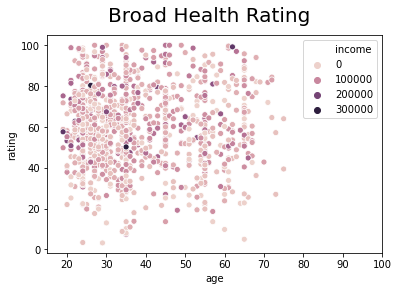

In [52]:
fig, ax = plt.subplots()
broad_graph = sns.scatterplot(x='age',y='rating',hue='income',data=broad_health,ax =ax)
ax.set_xlim(15,100)
fig.suptitle('Broad Health Rating', fontsize=20)
plt.show()
fig = broad_graph.get_figure()
fig.savefig("broad_health.jpeg")

In [48]:
rate_narrow_health = rate[rate['aspect']=='your health'].reset_index()
rate_narrow_health = (rate_narrow_health.groupby('worker').mean()['rating']).reset_index()
rate_narrow_health.head()

,worker,rating
0,AW1005987207,78
1,AW10083168508,36
2,AW10108518316,97
3,AW10192560152,65
4,AW1039734587YY,77


In [49]:
narrow_health = demo.merge(rate_narrow_health,how='inner',on = 'worker')
narrow_health.head()

,worker,age,male,income,education,race,rating
0,AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),67
1,AW45861491036,35,0,50000,Some college,Black (non-Hispanic),61
2,AW62562980372,28,0,30000,Some college,Hispanic (any race),66
3,AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),39
4,AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),79


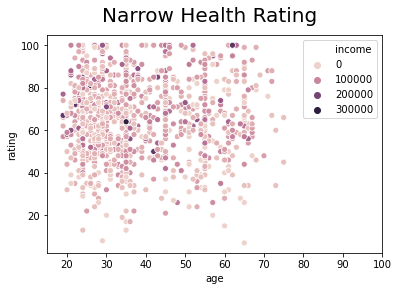

In [53]:
fig, ax = plt.subplots()
narrow_graph = sns.scatterplot(x='age',y='rating',hue='income',data=narrow_health,ax =ax)
ax.set_xlim(15,100)
fig.suptitle('Narrow Health Rating', fontsize=20)
plt.show()
fig = narrow_graph.get_figure()
fig.savefig("narrow_health.jpeg")

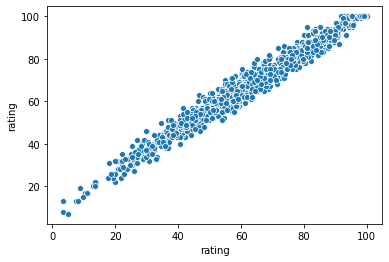

In [54]:
# I thought it was interesting how similar the scatterplots looked and so I plotted the two ratings together:
sns.scatterplot(x=broad_health['rating'],y=narrow_health['rating']);
# end of b

In [220]:
# c

In our data, income has a positive relationship with our measure of subjective well-being, but the effect size of income on SWB is relatively small. This provides some evidence that increased income improves subjective well-being.<br/>
<br/>
However, one should not be swayed too much by these findings. Firstly, there are many happiness-relevant variables that are not included in this dataset; including them in a regression could change the findings of our analysis. Second, there are reasons to be skeptical of subjective ratings as a metric for true well-being. Tyler Cowen has talked about how self-reported satisfaction surveys do not capture the effects on happiness of catastrophic events (which are probably more common among poorer people) as these surveys only record responses from people who are currently in a relatively stable environment. Your income also probably changes the amount of happiness you can imagine, which would lead wealthier people to give lower subjective ratings than poorer people holding their true well-being level constant. Finally, the questions in this survey revolve around how an individual evaluates aspects of their life; surveys that ask questions like these tend to find Scandinavian countries to be the happiest in the world, while surveys that ask about moments of laughter and joy tend to find Latin American countries to be the happiest. Both these types of questions seem like valuable ways of measuring happiness, but the fact that they lead to very different rank-orderings of happiness seems problematic for their usefulness at measuring true well-being.